### Importar Librerias

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Cargar los datos

In [13]:
train_path = 'data/train.csv'
test_path = 'data/test.csv'
submission_path = 'data/sample_submission.csv'

In [14]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission = pd.read_csv(submission_path)

### Verificar nombres de columnas

In [44]:
print("Nombres de columnas en Train:", train.columns)
print("Nombres de columnas en Test:", test.columns)

Nombres de columnas en Train: Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_in_euros'],
      dtype='object')
Nombres de columnas en Test: Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')


### Exploración inicial

In [63]:
def explore_data(df, name):
    print(f'\n{name} Dataset Info:')
    print(df.info())
    print('\nDescripción estadística:')
    print(df.describe())
    print('\nValores nulos:')
    print(df.isnull().sum())
    print('\nDuplicados:', df.duplicated().sum())

display(train.head())
display(test.head())

explore_data(train, "Train")
explore_data(test, "Test")


laptop_ID   Company   Product  TypeName    Inches  ScreenResolution  \
0   0.273680  0.185076 -0.363308  0.323675  0.430676          1.075818   
1  -0.084473 -0.525118 -1.255801 -1.298258  0.430676          1.075818   
2   0.676276  0.185076 -0.601675  0.323675  0.430676          1.075818   
3  -1.694855 -1.472044 -0.984172  1.134642 -1.171072         -1.126864   
4  -0.952407 -0.525118 -1.355582  0.323675  0.430676          1.075818   

        Cpu       Ram    Memory       Gpu     OpSys    Weight  Price_in_euros  
0  0.024969  0.868099 -0.592302 -0.451730  0.206865  1.260509       -0.832954  
1  1.056536 -1.800146 -1.160414  1.711263  0.206865 -0.884746       -0.338453  
2  1.185482  0.868099 -1.160414  0.701866  0.206865  1.587751       -0.307926  
3  0.231283  0.868099 -0.213561 -0.211398  2.927929  0.478763       -0.309467  
4 -0.026609 -0.275435 -1.160414 -1.653393 -2.514200 -1.230169       -0.994389

laptop_ID       Company  Product      TypeName  Inches  ScreenResolution  \
0      209.0  1.100000e+01    573.0  1.000000e+00    15.6      3.800000e+01   
1     1281.0  3.505967e-17    465.0  3.000000e+00    15.6     -8.764919e-17   
2     1168.0  1.100000e+01    671.0  3.000000e+00    15.6     -8.764919e-17   
3     1231.0  5.000000e+00    560.0 -1.168656e-17    15.6      5.000000e+00   
4     1020.0  8.000000e+00    600.0  3.000000e+00    14.0      3.800000e+01   

    Cpu  Ram  Memory   Gpu  OpSys  Weight  
0   5.0  1.0    22.0  87.0    4.0    29.0  
1  48.0  5.0    19.0  46.0    2.0    29.0  
2  68.0  5.0     2.0  52.0    4.0   165.0  
3  90.0  8.0     8.0  59.0    5.0     6.0  
4  90.0  5.0     8.0  59.0    5.0   161.0


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    float64
 1   Company           912 non-null    float64
 2   Product           912 non-null    float64
 3   TypeName          912 non-null    float64
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    float64
 6   Cpu               912 non-null    float64
 7   Ram               912 non-null    float64
 8   Memory            912 non-null    float64
 9   Gpu               912 non-null    float64
 10  OpSys             912 non-null    float64
 11  Weight            912 non-null    float64
 12  Price_in_euros    912 non-null    float64
dtypes: float64(13)
memory usage: 92.8 KB
None

Descripción estadística:
        laptop_ID       Company       Product      TypeName        Inches  \
count  912.000000  

### Verificar la presencia de 'Price_in_euros'

In [47]:
if 'Price_in_euros' not in train.columns:
    raise KeyError("La columna 'Price_in_euros' no está presente en el conjunto de datos de entrenamiento.")

### Separar la variable objetivo

In [64]:
price_col = 'Price_in_euros'
y_train = train[price_col]
train = train.drop(columns=[price_col])

### Visualización de distribuciones

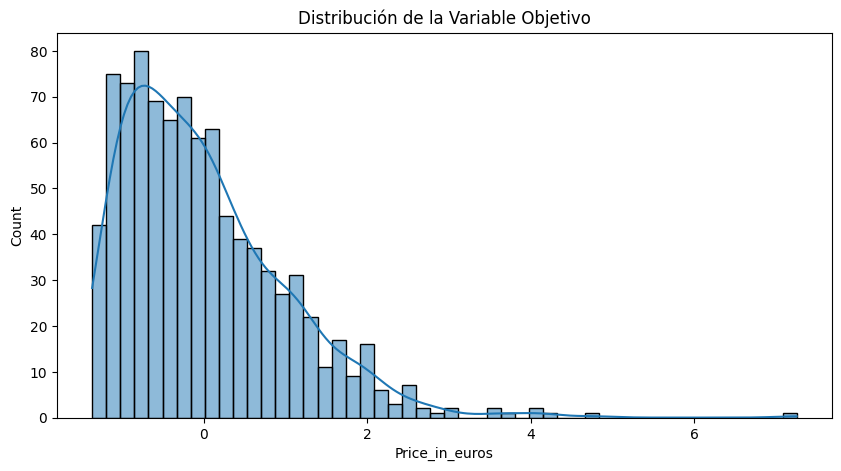

In [49]:
plt.figure(figsize=(10, 5))
sns.histplot(train['Price_in_euros'], bins=50, kde=True)
plt.title("Distribución de la Variable Objetivo")
plt.show()

### Boxplot para detectar valores atípicos

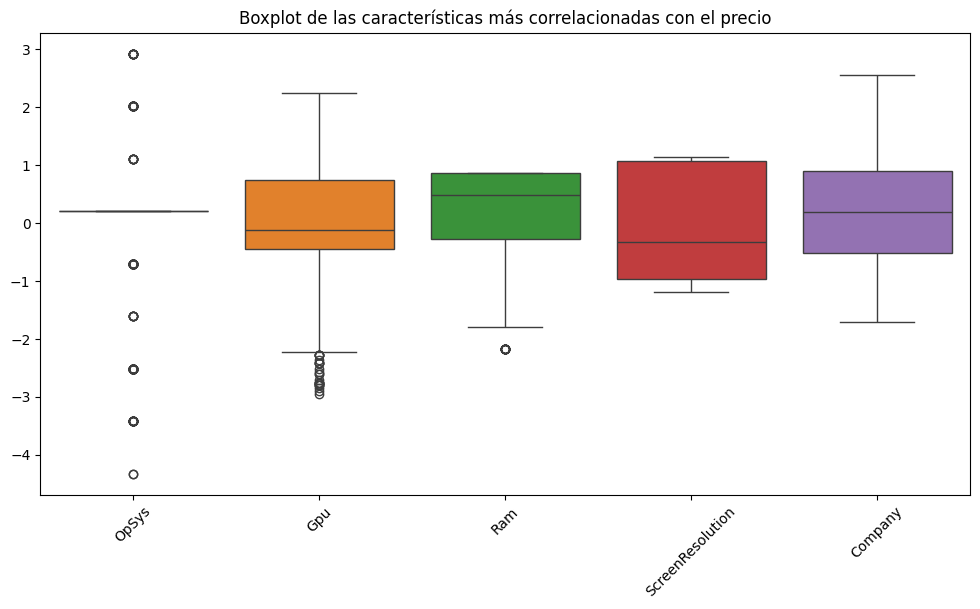

In [66]:
# Calculate the correlation of each feature with the target variable
correlation_with_target = train.join(y_train).corr()[y_train.name].abs().sort_values(ascending=False)

# Get the top 5 features most correlated with the target variable
top_features = correlation_with_target.index[1:6]  # Exclude the target variable itself

# Plot the boxplot for the top features
plt.figure(figsize=(12, 6))
sns.boxplot(data=train[top_features])
plt.xticks(rotation=45)
plt.title("Boxplot de las características más correlacionadas con el precio")
plt.show()

### Matriz de correlación

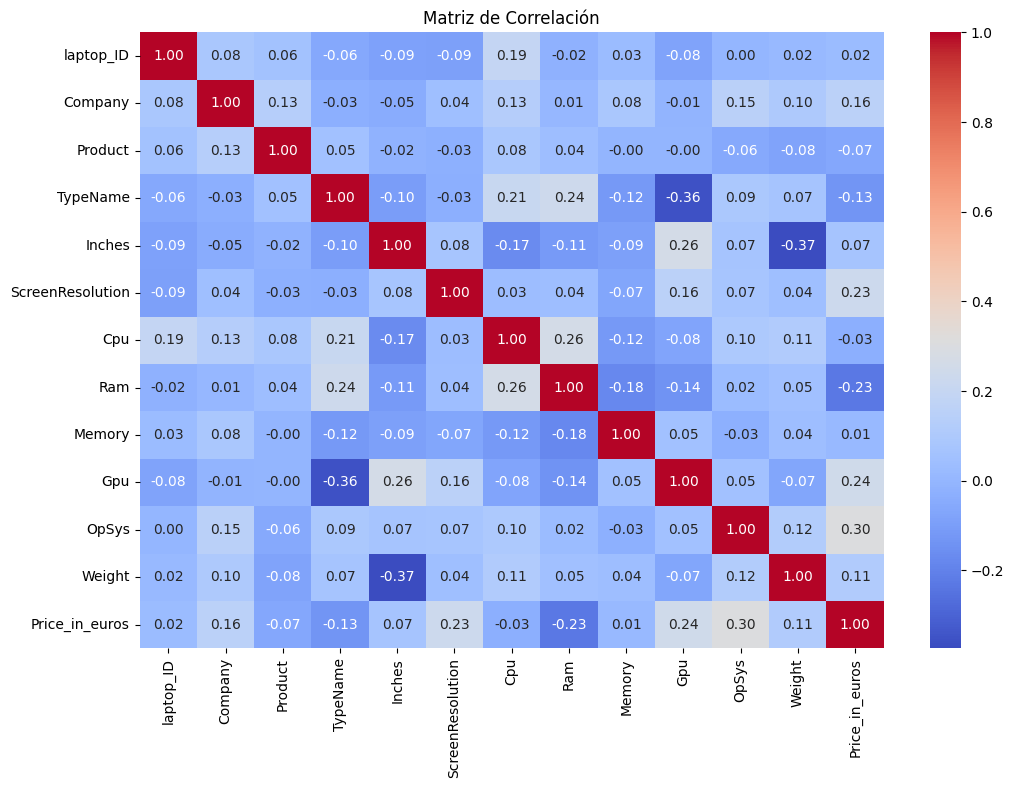

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

### Valores nulos visualizados

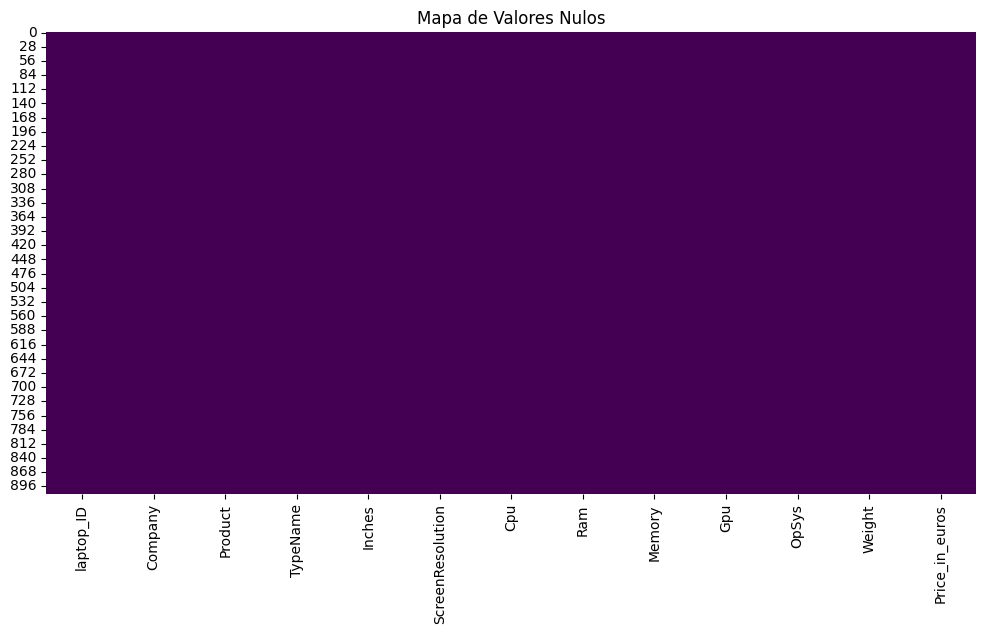

In [51]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de Valores Nulos")
plt.show()

### Conteo de categorías si hay variables categóricas

In [67]:
cat_cols = train.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=train[col], order=train[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.show()

### Análisis de sesgo y curtosis

In [68]:
num_cols = train.select_dtypes(include=['number']).columns
for col in num_cols:
    print(f'{col}: Skewness={skew(train[col].dropna()):.2f}, Kurtosis={kurtosis(train[col].dropna()):.2f}')

laptop_ID: Skewness=0.05, Kurtosis=-1.18
Company: Skewness=0.21, Kurtosis=-0.45
Product: Skewness=0.85, Kurtosis=0.58
TypeName: Skewness=-0.76, Kurtosis=-0.24
Inches: Skewness=-0.40, Kurtosis=-0.16
ScreenResolution: Skewness=0.01, Kurtosis=-1.86
Cpu: Skewness=-0.56, Kurtosis=-1.13
Ram: Skewness=-0.81, Kurtosis=-0.66
Memory: Skewness=0.70, Kurtosis=-0.73
Gpu: Skewness=-0.28, Kurtosis=0.31
OpSys: Skewness=-1.53, Kurtosis=4.96
Weight: Skewness=0.12, Kurtosis=-1.43


### Distribución de variables numéricas

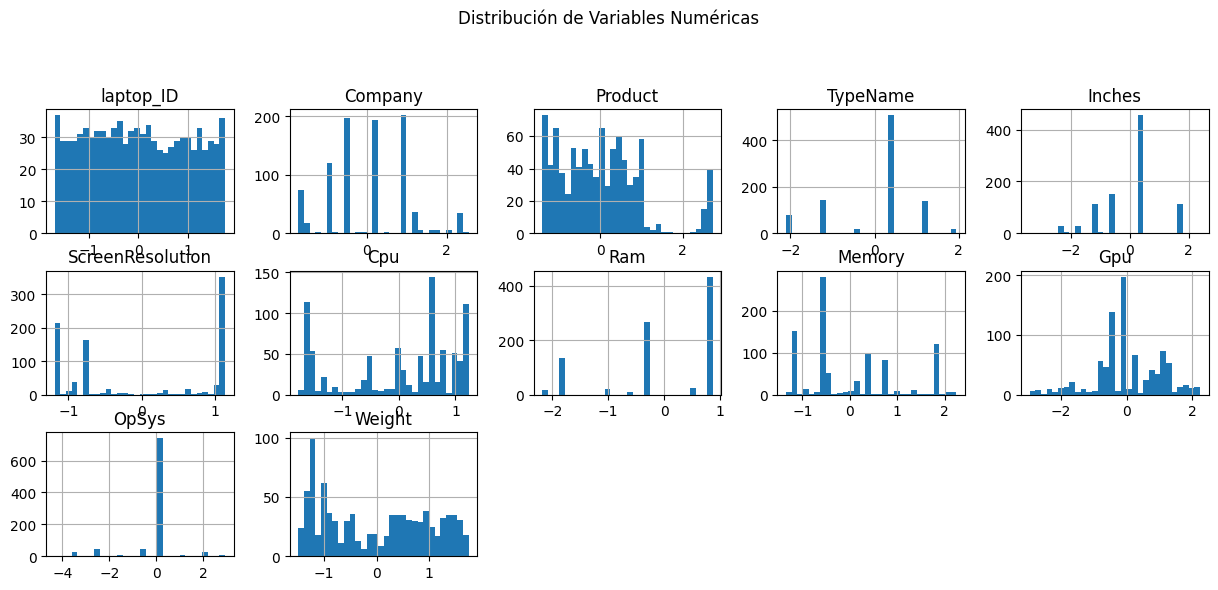

In [69]:
train[num_cols].hist(figsize=(15, 10), bins=30, layout=(5, 5))
plt.suptitle("Distribución de Variables Numéricas")
plt.show()

### Codificación de variables categóricas

In [56]:
le = LabelEncoder()
for col in cat_cols:
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

### Normalización de datos

In [62]:
scaler = StandardScaler()
num_cols_excluding_target = num_cols.drop('Price_in_euros')
train[num_cols_excluding_target] = scaler.fit_transform(train[num_cols_excluding_target])
test[num_cols_excluding_target] = scaler.transform(test[num_cols_excluding_target])

print("\nDatos transformados y listos para modelado.")


Datos transformados y listos para modelado.
